###**SUPERVISED LEARNING -BOOSTING ALGORITHMS FOR 3000 SAMPLES PER CLASS.**

# Import Data for X and y

In [1]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
with open('/content/df_features_train3000.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [3]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_electronic_014-052-127,0,-512.513306,49.239880,36.635098,36.231136,25.086309,17.622725,12.361383,6.291051,1.361823,...,0.103532,0.832282,0.112285,0.067642,0.073308,0.077919,0.107368,0.076912,0.052838,0
bass_synthetic_111-096-127,1,-638.111877,2.346831,-3.926074,3.134792,-1.294184,2.011733,-2.365173,1.458554,0.189836,...,0.206547,0.179271,0.219101,0.196307,0.249212,0.267878,0.303538,0.249895,0.240109,0
bass_synthetic_020-108-075,1,-564.268677,-1.420730,-0.795149,3.250593,-3.291362,1.071149,2.291963,-3.577422,2.212168,...,0.275572,0.221840,0.195931,0.186434,0.132046,0.122447,0.112924,0.111629,0.168877,0
bass_synthetic_030-078-100,1,-472.562500,15.968258,-23.635908,-8.557285,4.469436,-3.720913,-8.350245,-3.516767,5.632018,...,0.037288,0.060668,0.057510,0.781476,0.074805,0.064859,0.049139,0.026667,0.043386,0
bass_synthetic_131-080-100,0,-502.142853,30.960215,21.120899,21.180164,18.814318,18.428780,17.238117,16.952642,16.951662,...,0.330870,0.322940,0.270194,0.209055,0.281756,0.253423,0.167752,0.158776,0.133259,0


In [4]:
df_train.shape

(30000, 167)

In [5]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [6]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [7]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

In [8]:
X_test.shape

(4096, 166)

In [9]:
y_test.shape

(4096,)

# Define Confusion Matrix Function

In [10]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [11]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Adaptive Boosting

In [12]:
# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=256,
                         learning_rate=0.1)

In [13]:
# Train Adaboost Classifer
model = ada.fit(X_train, y_train)

In [14]:
y_pred_ada = ada.predict(X_test)
accuracy_ada = np.mean(y_pred_ada == y_test)
print("The accuracy of Adaptive Boosting is {0:.2%}".format(accuracy_ada))

The accuracy of Adaptive Boosting is 42.31%


Normalized confusion matrix
[[0.45670225 0.         0.         0.08659549 0.18386714 0.10794781
  0.02372479 0.         0.         0.14116251]
 [0.01115242 0.37546468 0.11152416 0.         0.08550186 0.
  0.00371747 0.07434944 0.05204461 0.28624535]
 [0.15       0.         0.36666667 0.         0.01666667 0.20555556
  0.13888889 0.06111111 0.         0.06111111]
 [0.12423313 0.03067485 0.         0.34509202 0.18404908 0.17791411
  0.02300613 0.04601227 0.00306748 0.06595092]
 [0.19451697 0.02480418 0.00261097 0.22845953 0.29634465 0.16057441
  0.06266319 0.02349869 0.00522193 0.00130548]
 [0.14851485 0.         0.         0.21287129 0.05940594 0.57920792
  0.         0.         0.         0.        ]
 [0.02390438 0.0498008  0.03386454 0.         0.01593625 0.05577689
  0.5936255  0.03585657 0.04183267 0.14940239]
 [0.         0.12765957 0.07659574 0.22553191 0.         0.11914894
  0.         0.19148936 0.24680851 0.01276596]
 [0.04901961 0.         0.01633987 0.05882353 0.22222222 0.0

<Axes: title={'center': 'Adaptive Boosting Normalized confusion matrix - 3000 samples'}, xlabel='Predicted label', ylabel='True label'>

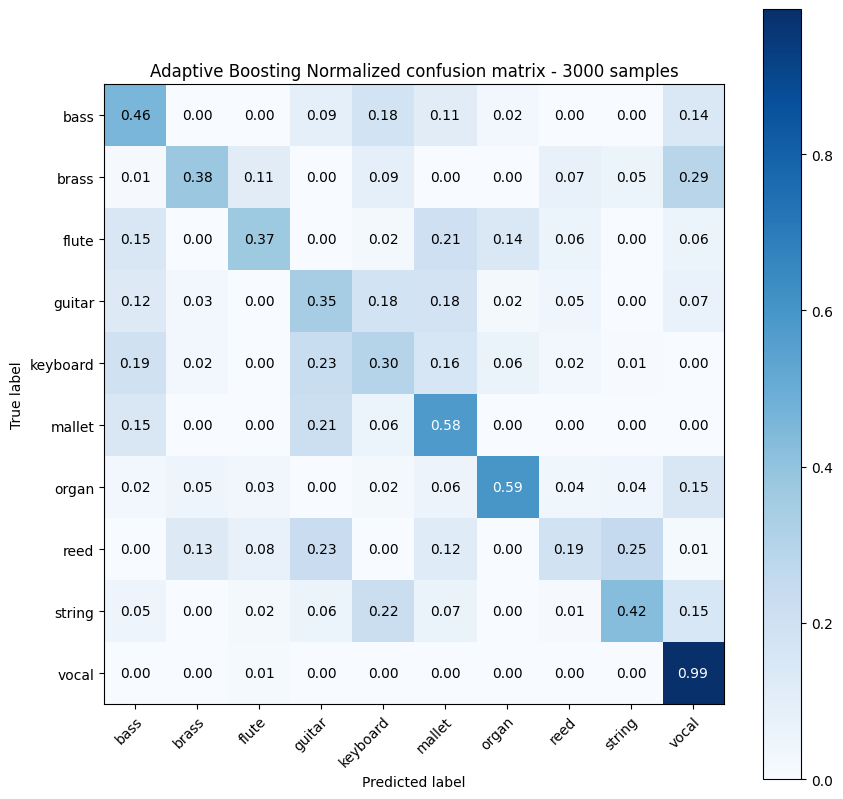

In [15]:
plot_confusion_matrix(y_test, y_pred_ada, classes=class_names, normalize=True,
                      title='Adaptive Boosting Normalized confusion matrix - 3000 samples')

# Gradient Boosting

In [16]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.01)

In [17]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [18]:
y_pred_GB = gradient_booster.predict(X_test)
accuracy_GB = np.mean(y_pred_GB == y_test)
print("The accuracy of Gradient boosting is {0:.2%}".format(accuracy_GB))

The accuracy of Gradient boosting is 40.14%


Normalized confusion matrix
[[0.45432977 0.00711744 0.01067616 0.09134045 0.15302491 0.19572954
  0.06049822 0.00474496 0.00237248 0.02016607]
 [0.         0.4535316  0.07806691 0.01858736 0.0929368  0.
  0.         0.00743494 0.07063197 0.27881041]
 [0.15       0.00555556 0.6        0.         0.01111111 0.11111111
  0.02222222 0.02777778 0.         0.07222222]
 [0.15184049 0.05368098 0.00306748 0.29294479 0.26380368 0.15184049
  0.00153374 0.01687117 0.02147239 0.04294479]
 [0.22062663 0.04830287 0.00261097 0.19712794 0.30939948 0.16057441
  0.0156658  0.01174935 0.         0.03394256]
 [0.18316832 0.01980198 0.0049505  0.05940594 0.06930693 0.6039604
  0.03465347 0.02475248 0.         0.        ]
 [0.06374502 0.06573705 0.03585657 0.         0.05378486 0.03187251
  0.48605578 0.05179283 0.08366534 0.12749004]
 [0.         0.15744681 0.05957447 0.15319149 0.00425532 0.11489362
  0.         0.17446809 0.27659574 0.05957447]
 [0.05228758 0.00326797 0.00980392 0.09150327 0.14052288 0.09

<Axes: title={'center': 'Gradient boosting Normalized confusion matrix - 3000 samples'}, xlabel='Predicted label', ylabel='True label'>

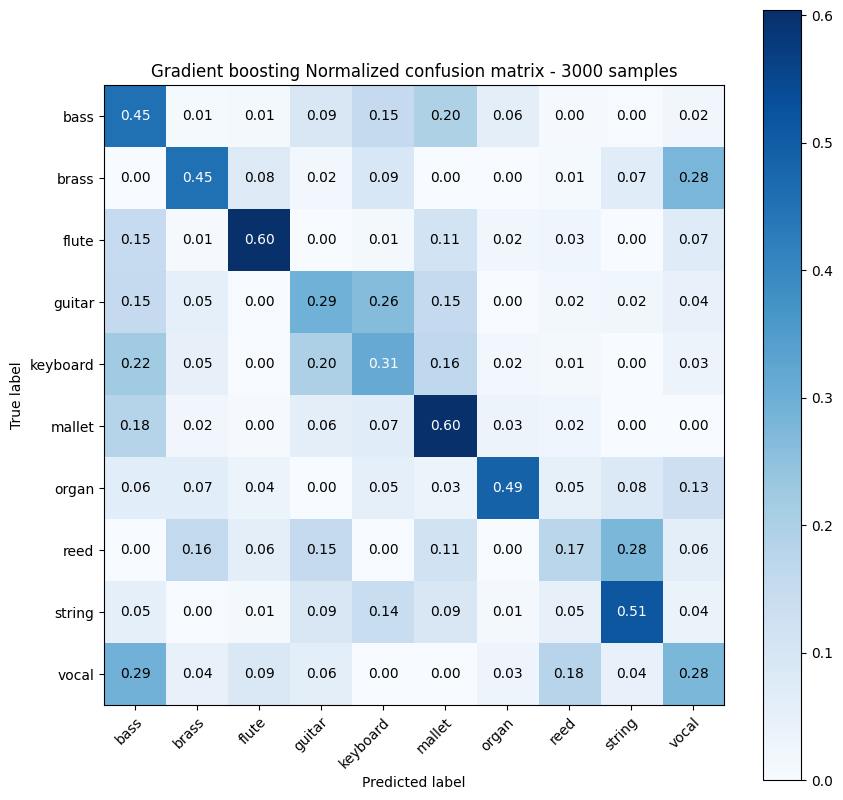

In [19]:
plot_confusion_matrix(y_test, y_pred_GB, classes=class_names, normalize=True,
                      title='Gradient boosting Normalized confusion matrix - 3000 samples')

# Extreme Gradient Boosting

In [20]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [21]:
# Get the number of unique classes
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [22]:
n=128
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': num_classes,
    'max_depth': 8,
    'eta': 0.04,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'gamma': 0.1,
    'learning_rate': 0.01,
    'seed': 42
}

# Train the model
XGBmodel = xgb.train(params,
                     xgb_train,
                     num_boost_round=n)

In [23]:
XGB_preds = XGBmodel.predict(xgb_test)
# Convert predicted probabilities to class labels
y_pred_XGB_classes = np.argmax(XGB_preds, axis=1)

In [24]:
# Calculate accuracy
accuracy_XGB = np.mean(y_pred_XGB_classes == y_test)
print("The accuracy of Extreme Gradient Boosting is {0:.2%}".format(accuracy_XGB))

The accuracy of Extreme Gradient Boosting is 58.01%


In [25]:
accuracy= accuracy_score(y_test,y_pred_XGB_classes)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 58.0078125


Normalized confusion matrix
[[0.65124555 0.         0.         0.07236062 0.0688019  0.17200474
  0.01897983 0.00118624 0.00118624 0.01423488]
 [0.01858736 0.62081784 0.0260223  0.04460967 0.01115242 0.
  0.         0.05204461 0.01858736 0.20817844]
 [0.02222222 0.00555556 0.78888889 0.         0.         0.02222222
  0.03888889 0.03888889 0.01111111 0.07222222]
 [0.13803681 0.00153374 0.00920245 0.52607362 0.25766871 0.05368098
  0.00460123 0.         0.00920245 0.        ]
 [0.1618799  0.01174935 0.00391645 0.24804178 0.47911227 0.05744125
  0.02219321 0.00913838 0.00130548 0.00522193]
 [0.16831683 0.01485149 0.         0.06435644 0.18811881 0.52970297
  0.00990099 0.         0.02475248 0.        ]
 [0.10756972 0.01792829 0.0498008  0.         0.03585657 0.03984064
  0.58366534 0.06772908 0.02390438 0.07370518]
 [0.00425532 0.33617021 0.08510638 0.04680851 0.01276596 0.
  0.         0.31914894 0.16170213 0.03404255]
 [0.04248366 0.01633987 0.00326797 0.02287582 0.06535948 0.03921569


<Axes: title={'center': 'Extreme Gradient boosting Normalized confusion matrix - 3000 samples'}, xlabel='Predicted label', ylabel='True label'>

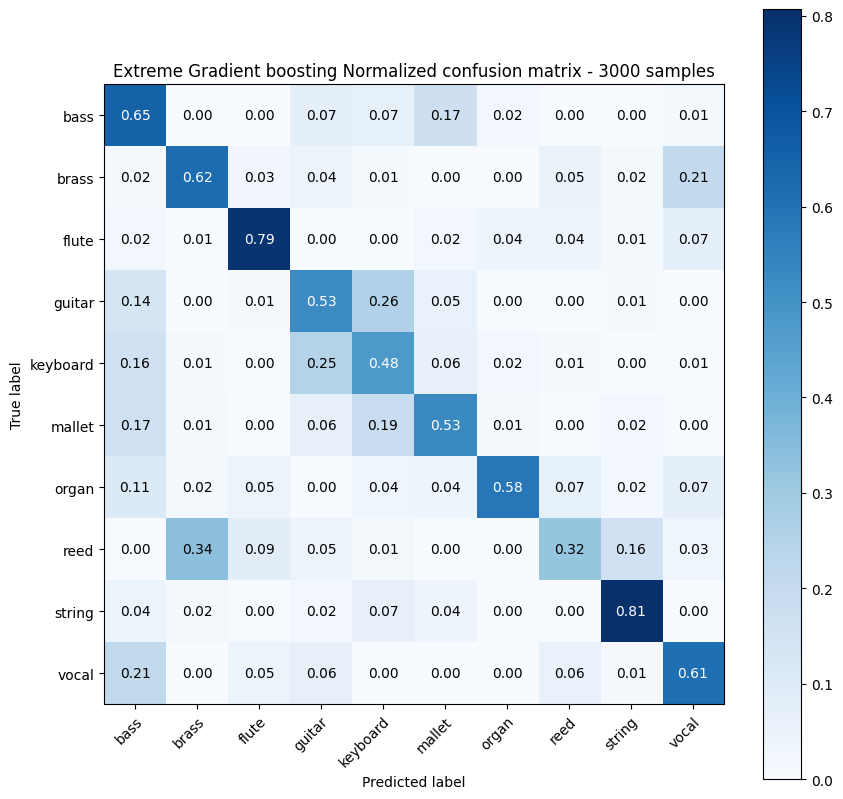

In [26]:
plot_confusion_matrix(y_test, y_pred_XGB_classes, classes=class_names, normalize=True,
                      title='Extreme Gradient boosting Normalized confusion matrix - 3000 samples')